In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv("/content/drive/My Drive/personal project/spotify me/both (1).csv", index_col=0)
df.head()

,id,title,artist,album,release date,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,owner
0,6Kkt27YmFyIFrcX3QXFi2o,Liability,Lorde,Melodrama,2017-06-16,171728,72,0.587,0.22900,10,-11.254,0,0.1280,0.9200,0.000000,0.1000,0.379,75.670,4,me
1,5Htq8DDDN0Xce9MwqzAzui,La La Lost You,88rising,Head In The Clouds II,2019-10-11,200000,67,0.721,0.58200,2,-8.251,1,0.0411,0.3150,0.000559,0.0650,0.487,100.083,4,me
2,44ZgNPCwK6tMNErjUJLIn8,All The Bright Places I - Solo Piano Version,Keegan DeWitt,All The Bright Places (Music from the Netflix ...,2020-02-28,127068,33,0.718,0.10700,8,-31.183,1,0.0652,0.9950,0.916000,0.1050,0.857,120.026,3,me
3,4JiDOmbJiV30RtE6msZgxF,Small Memory,Jon Hopkins,Insides,2009-05-03,100947,55,0.000,0.00834,1,-23.201,1,0.0000,0.9930,0.936000,0.1950,0.000,0.000,0,me
4,2oxBo0YLW89NLuv64Pvohc,Saving Grace,Kodaline,One Day at a Time,2020-06-12,230899,55,0.450,0.71800,3,-5.950,1,0.0295,0.0304,0.000000,0.0942,0.370,156.009,4,me


In [6]:
df[df["owner"]=="me"].head()

,id,title,artist,album,release date,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,owner
0,6Kkt27YmFyIFrcX3QXFi2o,Liability,Lorde,Melodrama,2017-06-16,171728,72,0.587,0.22900,10,-11.254,0,0.1280,0.9200,0.000000,0.1000,0.379,75.670,4,me
1,5Htq8DDDN0Xce9MwqzAzui,La La Lost You,88rising,Head In The Clouds II,2019-10-11,200000,67,0.721,0.58200,2,-8.251,1,0.0411,0.3150,0.000559,0.0650,0.487,100.083,4,me
2,44ZgNPCwK6tMNErjUJLIn8,All The Bright Places I - Solo Piano Version,Keegan DeWitt,All The Bright Places (Music from the Netflix ...,2020-02-28,127068,33,0.718,0.10700,8,-31.183,1,0.0652,0.9950,0.916000,0.1050,0.857,120.026,3,me
3,4JiDOmbJiV30RtE6msZgxF,Small Memory,Jon Hopkins,Insides,2009-05-03,100947,55,0.000,0.00834,1,-23.201,1,0.0000,0.9930,0.936000,0.1950,0.000,0.000,0,me
4,2oxBo0YLW89NLuv64Pvohc,Saving Grace,Kodaline,One Day at a Time,2020-06-12,230899,55,0.450,0.71800,3,-5.950,1,0.0295,0.0304,0.000000,0.0942,0.370,156.009,4,me


In [7]:
df[df["owner"]=="my boyfriend"].head()

,id,title,artist,album,release date,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,owner
50,0HWoJkzmJsQ3GTFAANr2bA,Arni (Home World),Yasunori Mitsuda,Chrono Cross Original Soundtrack,1999,203133,30,0.592,0.366,8,-11.695,1,0.0296,0.697000,0.947,0.1380,0.459,122.027,3,my boyfriend
51,3DamFFqW32WihKkTVlwTYQ,Fireflies,Owl City,Ocean Eyes,2009-01-01,228347,79,0.512,0.662,3,-6.797,1,0.0439,0.027500,0.000,0.1180,0.472,180.114,4,my boyfriend
52,2DLrgv7HhJanCuD8L9uJLR,Zenzenzense - movie ver.,RADWIMPS,Your Name.,2016-08-24,285880,66,0.321,0.906,11,-3.967,1,0.1410,0.000439,0.000,0.0862,0.641,189.776,4,my boyfriend
53,2oxBo0YLW89NLuv64Pvohc,Saving Grace,Kodaline,One Day at a Time,2020-06-12,230899,55,0.450,0.718,3,-5.950,1,0.0295,0.030400,0.000,0.0942,0.370,156.009,4,my boyfriend
54,2gApWgkuisXedOcS9Tligs,New Page,INTERSECTION,New Page,2020-01-08,270904,54,0.604,0.733,2,-5.788,1,0.0348,0.105000,0.000,0.2500,0.399,124.885,4,my boyfriend


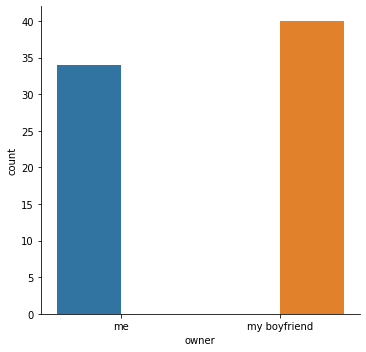

In [5]:
sns.catplot(x="owner", hue="owner", kind="count",
            data=df[df["popularity"]>50]);

In [8]:
df2 = df.copy().drop(["id",	"title",	"artist",	
                "album",	"release date", 
                "key", "mode", "time_signature",
                "duration_ms",	"popularity", 
                "instrumentalness",	"liveness"], axis=1)
df2.head()

,danceability,energy,loudness,speechiness,acousticness,valence,tempo,owner
0,0.587,0.22900,-11.254,0.1280,0.9200,0.379,75.670,me
1,0.721,0.58200,-8.251,0.0411,0.3150,0.487,100.083,me
2,0.718,0.10700,-31.183,0.0652,0.9950,0.857,120.026,me
3,0.000,0.00834,-23.201,0.0000,0.9930,0.000,0.000,me
4,0.450,0.71800,-5.950,0.0295,0.0304,0.370,156.009,me


<Figure size 3600x3600 with 0 Axes>

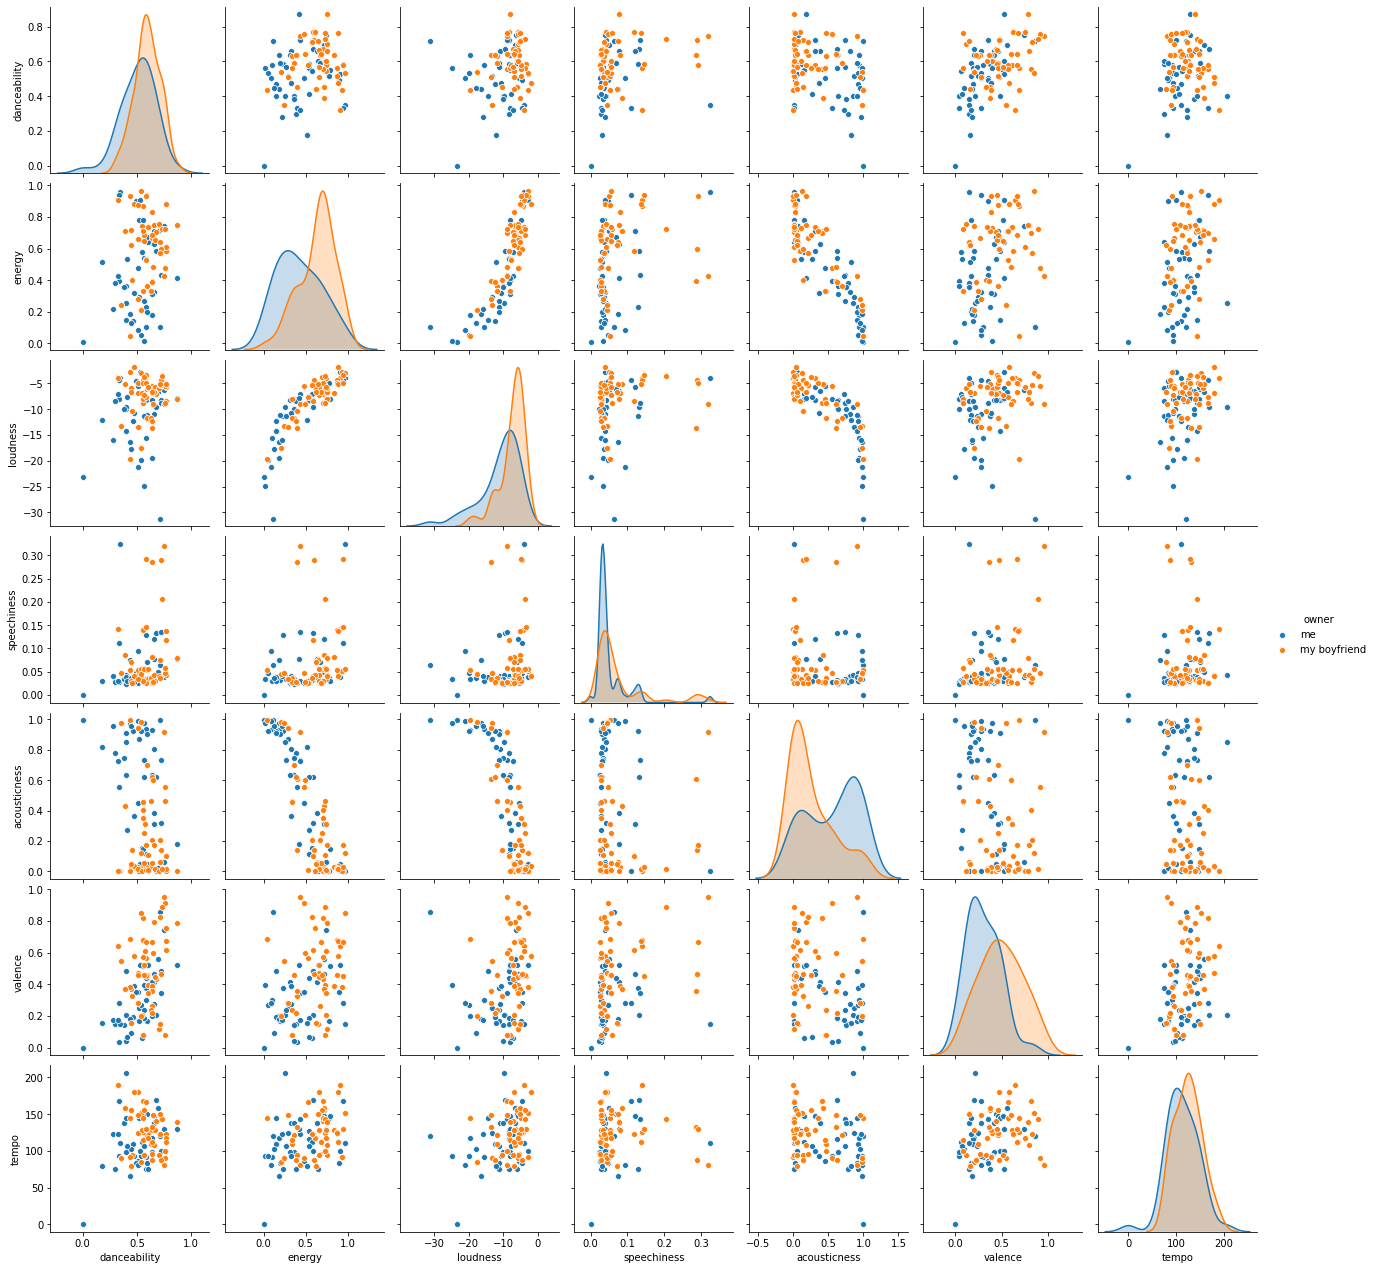

In [9]:
plt.figure(figsize=(50,50))
sns.pairplot(data=df2, hue="owner");

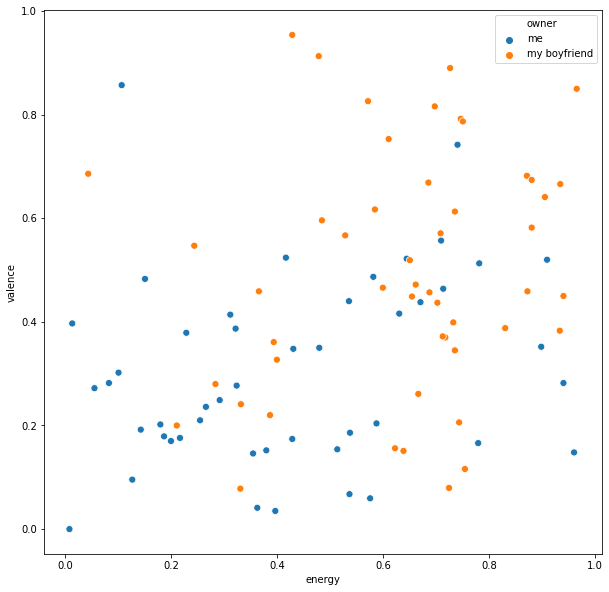

In [10]:
plt.figure(figsize=(10,10))
energy_valence = sns.scatterplot(x="energy", y="valence", 
                     hue="owner", data=df, s=50)

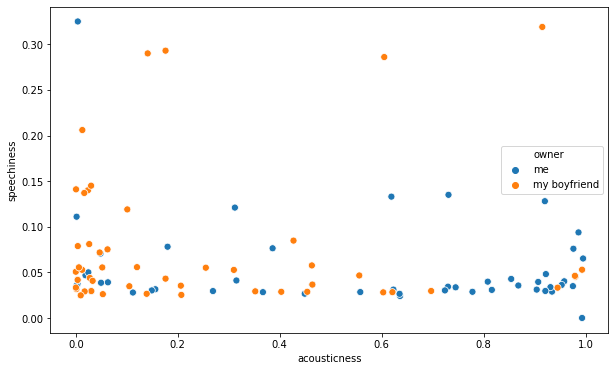

In [11]:
plt.figure(figsize=(10,6))
energy_valence = sns.scatterplot(y="speechiness", x="acousticness", 
                     hue="owner", data=df, s=50)

<Figure size 720x720 with 0 Axes>

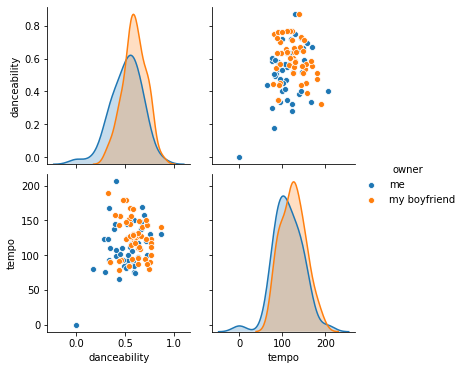

In [14]:
df3 = df[{"tempo","danceability", "owner"}]
plt.figure(figsize=(10,10))
sns.pairplot(data=df3, hue="owner");

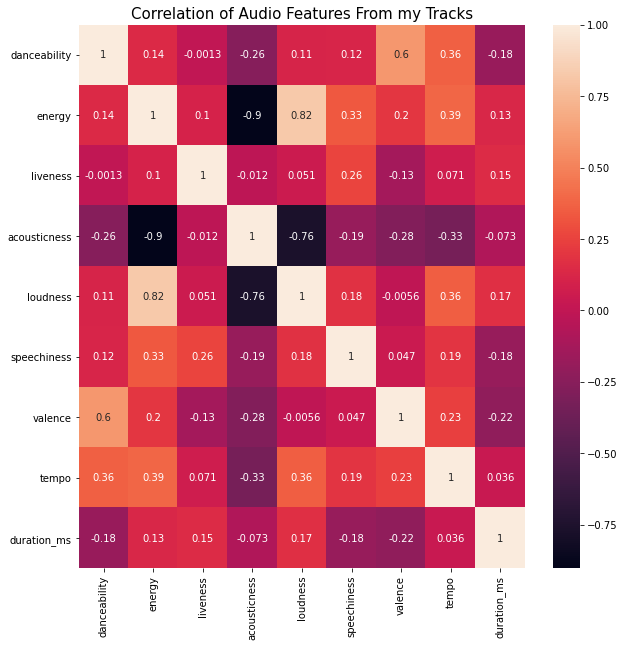

In [15]:
# Heatmap
top10=df[df["owner"]=="me"].copy()
top10=top10[['danceability','energy','liveness',
             'acousticness','loudness','speechiness',
             'valence','tempo','duration_ms']]
corr=top10.corr()
ax = plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.title("Correlation of Audio Features From my Tracks",size=15)
plt.show("Correlation of Audio Features From my Tracks")

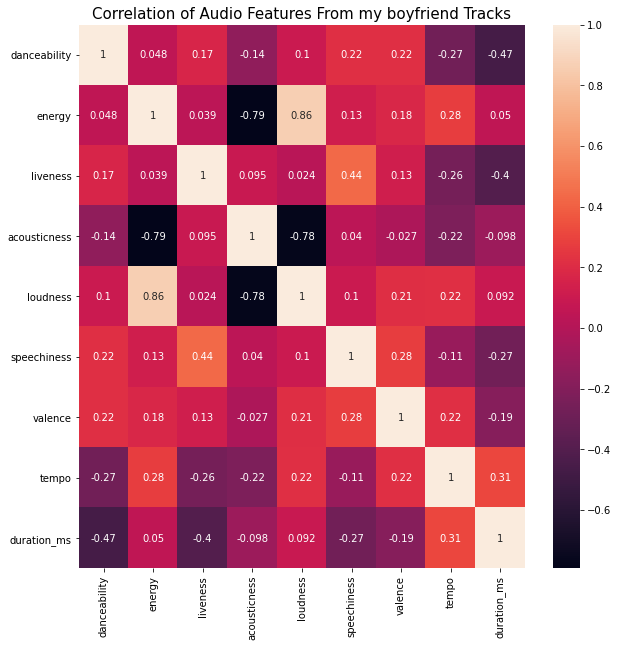

In [16]:
# Heatmap
top10=df[df["owner"]=="my boyfriend"].copy()
top10=top10[['danceability','energy','liveness',
             'acousticness','loudness','speechiness',
             'valence','tempo','duration_ms']]
corr=top10.corr()
ax = plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.title("Correlation of Audio Features From my boyfriend Tracks",size=15)
plt.show("Correlation of Audio Features From my boyfriend Tracks")

# Turns out there's correlation between:


*   loudness & energy
*   acousticness & energy
*   acousticness & loudness 




### loudness & energy

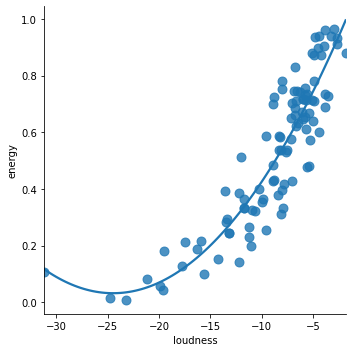

In [17]:
sns.lmplot(x="loudness", y="energy", data=df,
           order=2, ci=None, scatter_kws={"s": 80});

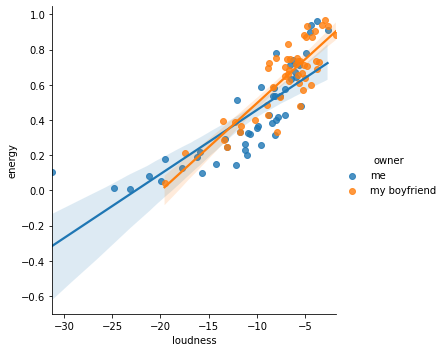

In [19]:
sns.lmplot(x="loudness", y="energy", hue="owner", data=df);

### acousticness & energy

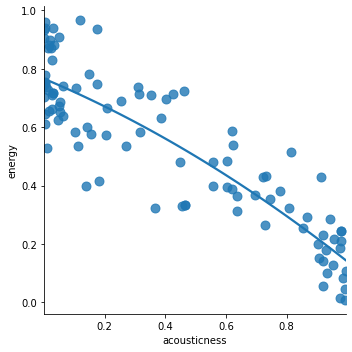

In [20]:
sns.lmplot(x="acousticness", y="energy", data=df,
           order=2, ci=None, scatter_kws={"s": 80});

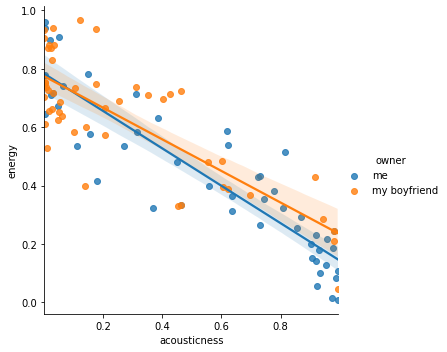

In [21]:
sns.lmplot(x="acousticness", y="energy", hue="owner", data=df);

### acousticness & loudness

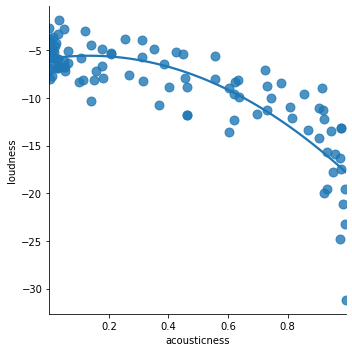

In [22]:
sns.lmplot(x="acousticness", y="loudness", data=df,
           order=2, ci=None, scatter_kws={"s": 80});

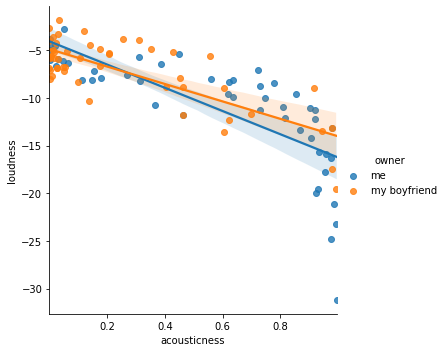

In [23]:
sns.lmplot(x="acousticness", y="loudness", hue="owner", data=df);

# IS THERE ANY OF MY SONGS THAT SOUND LIKE MY BOYFRIEND'S?

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
df13 = df[{"danceability",	"energy",	"loudness",
   "speechiness",	"acousticness",	"valence",
   "tempo", "instrumentalness",	"liveness", "owner"}	].copy()

In [25]:
df13.head() 

,tempo,instrumentalness,liveness,danceability,speechiness,acousticness,loudness,owner,energy,valence
0,75.670,0.000000,0.1000,0.587,0.1280,0.9200,-11.254,me,0.22900,0.379
1,100.083,0.000559,0.0650,0.721,0.0411,0.3150,-8.251,me,0.58200,0.487
2,120.026,0.916000,0.1050,0.718,0.0652,0.9950,-31.183,me,0.10700,0.857
3,0.000,0.936000,0.1950,0.000,0.0000,0.9930,-23.201,me,0.00834,0.000
4,156.009,0.000000,0.0942,0.450,0.0295,0.0304,-5.950,me,0.71800,0.370


In [30]:
cs = cosine_similarity(df13[df13["owner"]=="me"].drop(["owner"], axis=1), 
                       df13[df13["owner"]=="my boyfriend"].drop(["owner"], axis=1))
cs

array([[0.99858789, 0.99387901, 0.99188633, ..., 0.99489558, 0.99993885,
        0.99612051],
       [0.99987118, 0.99898988, 0.99809687, ..., 0.99938277, 0.99840861,
        0.99974359],
       [0.98743538, 0.97659004, 0.97283433, ..., 0.97862084, 0.99326399,
        0.98115994],
       ...,
       [0.99759258, 0.99992204, 0.99996329, ..., 0.9997862 , 0.99376437,
        0.99943384],
       [0.99964935, 0.9994496 , 0.99875017, ..., 0.99972025, 0.99768855,
        0.99993367],
       [0.99934288, 0.99973255, 0.99920347, ..., 0.99990699, 0.99694009,
        0.99999344]])

In [72]:
song_alike = pd.DataFrame()
my_song_col = []
myboyfriend_song_col = []
socre_col = []

for i in range(50):
  scores = list(enumerate(cs[i]))
  sorted_scores= sorted(scores,key=lambda x:x[1],reverse=True)
  sorted_scores = sorted_scores[0]
  temp = 50
  my_song_col.append(df["title"][i])
  myboyfriend_song_col.append(df["title"][temp+sorted_scores[0]])
  socre_col.append(sorted_scores[1])

song_alike["my tracks"] = my_song_col
song_alike["my boyfriend tracks"] = myboyfriend_song_col
song_alike["how similar"] = socre_col
song_alike.head()

,my tracks,my boyfriend tracks,how similar
0,Liability,Taruh,0.999988
1,La La Lost You,Scared of the Dark (feat. XXXTENTACION),0.999984
2,All The Bright Places I - Solo Piano Version,Intro,0.998622
3,Small Memory,Intro,0.201139
4,Saving Grace,Saving Grace,1.000000


In [73]:
song_alike.sort_values("how similar", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 
song_alike.head(10)

,my tracks,my boyfriend tracks,how similar
5,Sephia - OST Generasi 90an Melankolia,Sephia - OST Generasi 90an Melankolia,1.000000
4,Saving Grace,Saving Grace,1.000000
30,Taruh,Taruh,1.000000
14,Pumpin Blood - Taken by Trees x Belief Remix,Unbelievable,0.999999
24,Stay Together For The Kids,Hide (feat. Seezyn),0.999998
9,I Choose - From The Netflix Original Film The ...,New Page,0.999997
33,Let You Down,Saving Grace,0.999996
32,Heavy (feat. Kiiara),Saving Grace,0.999996
40,London Boy,This Isn’t The End,0.999995
36,Misguided Ghosts,Sephia - OST Generasi 90an Melankolia,0.999995
